In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Read Data

In [3]:
FPTdf = pd.read_csv("FPT.csv", parse_dates=['Date/Time'], index_col=1)
PNJdf = pd.read_csv("PNJ.csv", parse_dates=['Date/Time'], index_col=1)
Appledf = pd.read_csv("AAPL.csv", parse_dates=['Date'], index_col=0)
IBMdf = pd.read_csv("IBM.csv", parse_dates=['Date/Time'])

## removing Open Interest
FPTdf = FPTdf.drop(columns=["Open Interest"])
PNJdf = PNJdf.drop(columns=["Open Interest"])
Appledf = Appledf.drop(columns=["Adj Close"])


## Our Tabular Data

In [4]:
FPTdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97406 entries, 2018-12-25 09:15:00 to 2020-12-22 14:46:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  97406 non-null  object 
 1   Open    97406 non-null  float64
 2   High    97406 non-null  float64
 3   Low     97406 non-null  float64
 4   Close   97406 non-null  float64
 5   Volume  97406 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 5.2+ MB


In [5]:
PNJdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125309 entries, 2018-02-28 09:15:00 to 2020-12-22 14:46:00
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Ticker  125309 non-null  object 
 1   Open    125309 non-null  float64
 2   High    125309 non-null  float64
 3   Low     125309 non-null  float64
 4   Close   125309 non-null  float64
 5   Volume  125309 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 6.7+ MB


In [6]:
Appledf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 798 entries, 2018-01-29 to 2021-03-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    798 non-null    float64
 1   High    798 non-null    float64
 2   Low     798 non-null    float64
 3   Close   798 non-null    float64
 4   Volume  798 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 37.4 KB


In [7]:
IBMdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98645 entries, 0 to 98644
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     98645 non-null  object        
 1   Date/Time  98645 non-null  datetime64[ns]
 2   Open       98645 non-null  float64       
 3   High       98645 non-null  float64       
 4   Low        98645 non-null  float64       
 5   Close      98645 non-null  float64       
 6   Volume     98645 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 5.3+ MB


In [8]:
FPTdf.head(-9)

,Ticker,Open,High,Low,Close,Volume
Date/Time,,,,,,
2018-12-25 09:15:00,FPT,30.89,30.89,30.89,30.89,35410
2018-12-25 09:16:00,FPT,30.81,30.81,30.81,30.81,190
2018-12-25 09:17:00,FPT,30.74,30.81,30.74,30.74,1120
2018-12-25 09:18:00,FPT,30.74,30.74,30.74,30.74,2120
2018-12-25 09:19:00,FPT,30.74,30.74,30.74,30.74,22500
...,...,...,...,...,...,...
2020-12-22 14:15:00,FPT,58.10,58.10,58.10,58.10,8410
2020-12-22 14:16:00,FPT,58.20,58.20,58.10,58.10,3860
2020-12-22 14:17:00,FPT,58.10,58.10,58.10,58.10,2060


In [9]:
PNJdf.head(-9)

,Ticker,Open,High,Low,Close,Volume
Date/Time,,,,,,
2018-02-28 09:15:00,PNJ,78.14,78.99,78.14,78.99,270
2018-02-28 09:16:00,PNJ,78.94,78.94,78.94,78.94,10
2018-02-28 09:19:00,PNJ,78.14,78.14,78.14,78.14,283
2018-02-28 09:20:00,PNJ,78.14,78.14,78.14,78.14,480
2018-02-28 09:21:00,PNJ,78.14,78.14,78.14,78.14,146
...,...,...,...,...,...,...
2020-12-22 14:12:00,PNJ,78.30,78.30,78.30,78.30,120
2020-12-22 14:13:00,PNJ,78.20,78.20,78.20,78.20,3470
2020-12-22 14:14:00,PNJ,78.20,78.20,78.20,78.20,670


In [10]:
IBMdf.set_index("Date/Time", inplace=True)
IBMdf.head(9)

,Ticker,Open,High,Low,Close,Volume
Date/Time,,,,,,
2018-01-02 06:20:00,IBM,110.209,110.419,109.867,110.051,104
2018-01-02 07:00:00,IBM,110.037,110.247,109.695,109.879,209
2018-01-02 07:35:00,IBM,110.252,110.462,109.910,110.094,115
2018-01-02 08:30:00,IBM,110.395,110.606,110.053,110.237,104
2018-01-02 08:35:00,IBM,110.395,110.606,110.053,110.237,209
2018-01-02 08:55:00,IBM,110.395,110.606,110.024,110.208,661
2018-01-02 09:00:00,IBM,110.567,110.786,110.224,110.416,722
2018-01-02 09:20:00,IBM,110.403,110.620,110.060,110.244,1046
2018-01-02 09:25:00,IBM,110.575,111.073,110.231,110.702,1317


# Plotting the Data

## Open Values

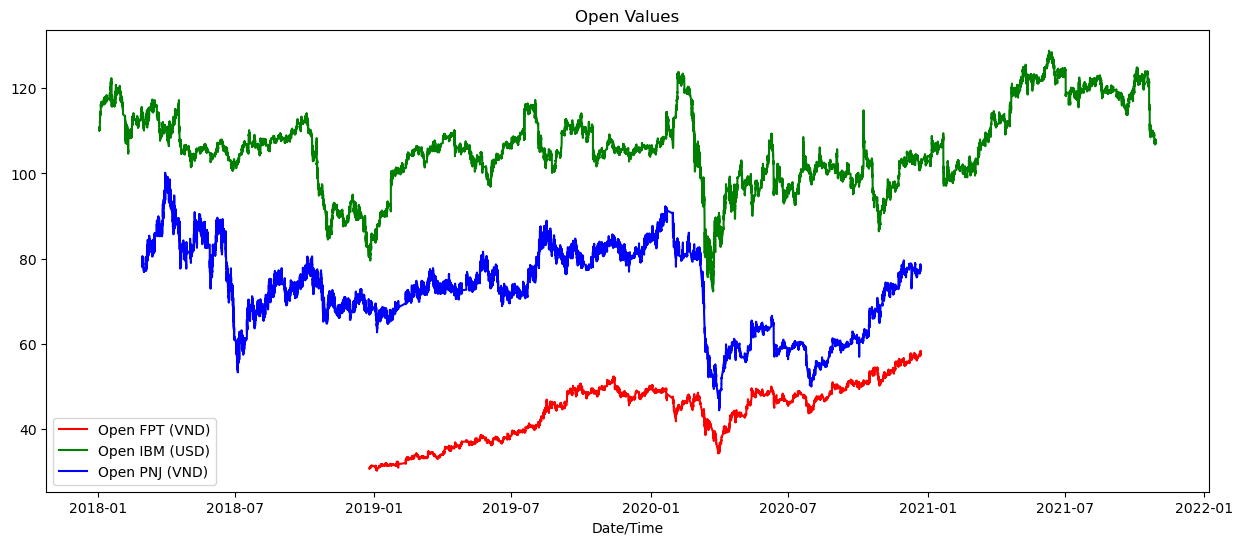

In [11]:
# Set the size of the plot
plt.figure(figsize=(15, 6))  

# Plot the "Open" attribute
plt.plot(FPTdf.index, FPTdf["Open"], label="Open FPT (VND)", c="red")
plt.plot(IBMdf.index, IBMdf["Open"], label="Open IBM (USD)", c="green")
plt.plot(PNJdf.index, PNJdf["Open"], label="Open PNJ (VND)", c="blue")

# Add labels and title to the plot
plt.legend()
plt.xlabel('Date/Time')
plt.title('Open Values')
plt.show()

# Show the plot





## Close Value

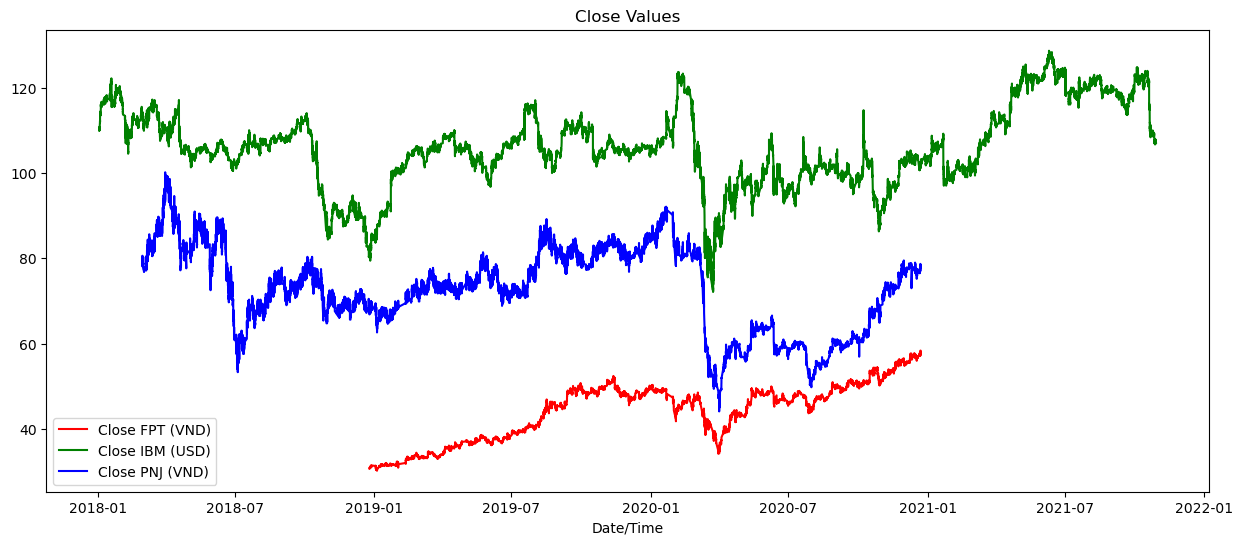

In [12]:
# Set the size of the plot
plt.figure(figsize=(15, 6))  

# Plot the "Open" attribute
plt.plot(FPTdf.index, FPTdf["Close"], label="Close FPT (VND)", c="red")
plt.plot(IBMdf.index, IBMdf["Close"], label="Close IBM (USD)", c="green")
plt.plot(PNJdf.index, PNJdf["Close"], label="Close PNJ (VND)", c="blue")

# Add labels and title to the plot
plt.legend()
plt.xlabel('Date/Time')
plt.title('Close Values')
plt.show()

# Show the plot





# Period Converting

In [13]:
def minuteToDay(input_df: pd.DataFrame):
    data = {
        "Date": [],
        "Ticker": [],
        "Open": [],
        "High": [],
        "Low": [],
        "Close": [],
        "Volume": [],
    }
     

    first_Date_In_Dataset = input_df.head(1).index.date
    last_Date_In_Dataset = input_df.tail(1).index.date
    
    current_date = first_Date_In_Dataset

    while current_date <= last_Date_In_Dataset:
        
        Data_In_Current_Date = input_df.loc[input_df.index.date == current_date] ## DataFrame type
        
        if (Data_In_Current_Date.shape[0] == 0):
            # print(current_date[0])
            current_date += datetime.timedelta(days=1)
            continue
            
            
        openValue = Data_In_Current_Date.head(1)['Open'].values[0]
        highValue = Data_In_Current_Date["High"].max()
        lowValue = Data_In_Current_Date["Low"].min()
        closeValue = Data_In_Current_Date.tail(1)["Close"].values[0]
        volumeValue = Data_In_Current_Date["Volume"].sum()
        
        
        data["Date"].append(current_date[0].strftime("%Y-%m-%d"))
        data["Ticker"].append(str(Data_In_Current_Date.iloc[0]['Ticker']))
        data["Open"].append(openValue)
        data["High"].append(highValue)
        data["Low"].append(lowValue)
        data["Close"].append(closeValue)
        data["Volume"].append(volumeValue)
        
        
        current_date += datetime.timedelta(days=1)
        
    
    
    output_df = pd.DataFrame(data)
    output_df['Date'] = pd.to_datetime(output_df['Date'])
    output_df.set_index('Date', inplace=True)
    
    return output_df
   


    

## PNJ Date

In [14]:
Date_Data_PNJ = minuteToDay(PNJdf)


In [15]:
Date_Data_PNJ.head(9)


,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2018-02-28,PNJ,78.14,80.61,78.09,78.71,8158
2018-03-01,PNJ,78.14,80.32,77.66,77.66,20511
2018-03-02,PNJ,77.14,77.90,76.86,77.33,37274
2018-03-05,PNJ,77.14,80.50,77.14,78.28,27737
2018-03-06,PNJ,78.61,83.13,77.43,81.45,41077
2018-03-07,PNJ,81.78,84.68,79.32,80.74,30644
2018-03-08,PNJ,83.18,84.10,80.74,82.35,23020
2018-03-09,PNJ,82.87,85.69,82.16,82.35,24416
2018-03-12,PNJ,82.87,84.19,81.45,81.78,16145


In [16]:
Date_Data_PNJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 709 entries, 2018-02-28 to 2020-12-22
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  709 non-null    object 
 1   Open    709 non-null    float64
 2   High    709 non-null    float64
 3   Low     709 non-null    float64
 4   Close   709 non-null    float64
 5   Volume  709 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 38.8+ KB


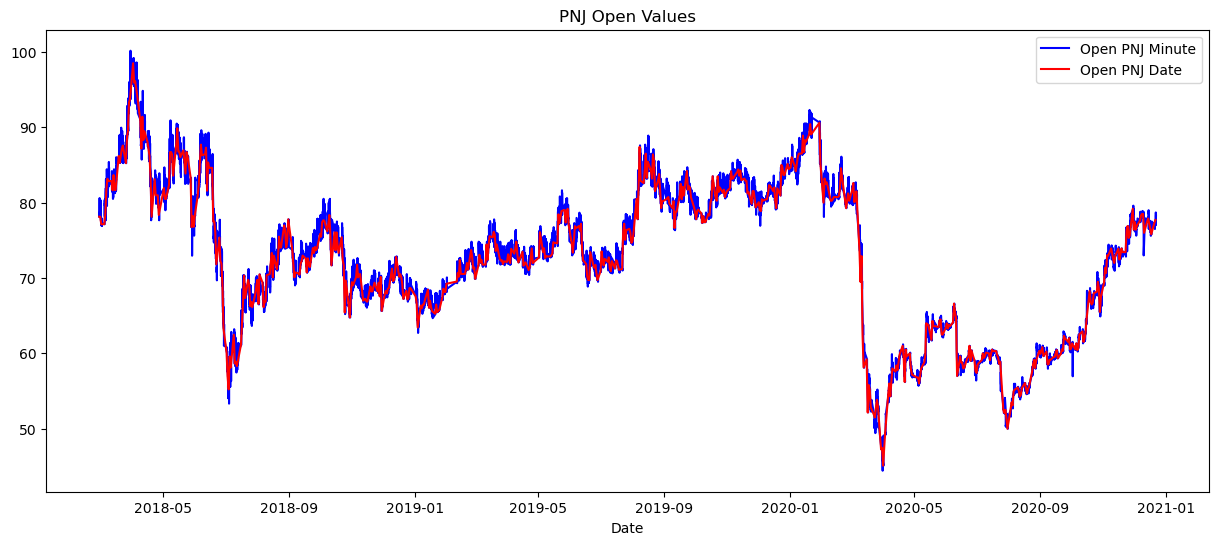

In [17]:
# Set the size of the plot
plt.figure(figsize=(15, 6))  

# Plot the "Open" attribute


plt.plot(PNJdf.index, PNJdf["Open"], label="Open PNJ Minute", c="blue")

plt.plot(Date_Data_PNJ.index, Date_Data_PNJ["Open"], label="Open PNJ Date", c="red")
# Add labels and title to the plot
plt.legend()
plt.xlabel('Date')
plt.title('PNJ Open Values')
plt.show()
# Show the plot

## FPT Date

In [18]:
Date_Data_FPT = minuteToDay(FPTdf)

In [19]:
Date_Data_FPT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 499 entries, 2018-12-25 to 2020-12-22
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  499 non-null    object 
 1   Open    499 non-null    float64
 2   High    499 non-null    float64
 3   Low     499 non-null    float64
 4   Close   499 non-null    float64
 5   Volume  499 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.3+ KB


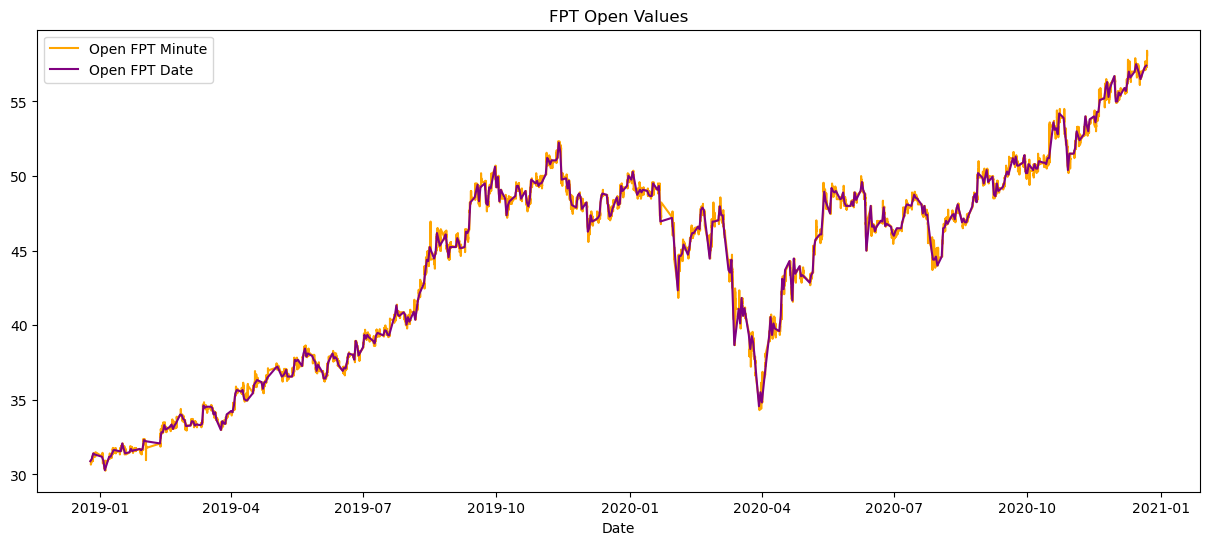

In [21]:
# Set the size of the plot
plt.figure(figsize=(15, 6))  

# Plot the "Open" attribute



plt.plot(FPTdf.index, FPTdf["Open"], label="Open FPT Minute", c="orange")

plt.plot(Date_Data_FPT.index, Date_Data_FPT["Open"], label="Open FPT Date", c="purple")


# Add labels and title to the plot
plt.legend()
plt.xlabel('Date')
plt.title('FPT Open Values')
plt.show()
# Show the plot

## IBM Date

In [22]:
Date_Data_IBM = minuteToDay(IBMdf)

In [23]:
Date_Data_IBM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 965 entries, 2018-01-02 to 2021-10-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  965 non-null    object 
 1   Open    965 non-null    float64
 2   High    965 non-null    float64
 3   Low     965 non-null    float64
 4   Close   965 non-null    float64
 5   Volume  965 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 52.8+ KB


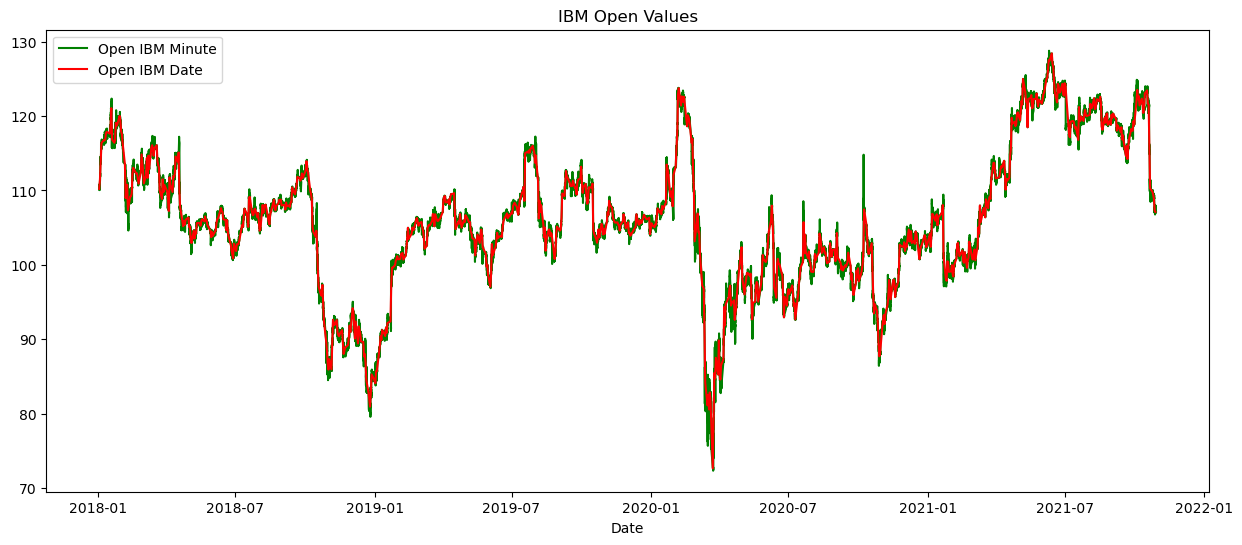

In [24]:
# Set the size of the plot
plt.figure(figsize=(15, 6))  

# Plot the "Open" attribute


plt.plot(IBMdf.index, IBMdf["Open"], label="Open IBM Minute", c="green")

plt.plot(Date_Data_IBM.index, Date_Data_IBM["Open"], label="Open IBM Date", c="red")
# Add labels and title to the plot
plt.legend()
plt.xlabel('Date')
plt.title('IBM Open Values')
plt.show()
# Show the plot

# Finding Outlier In Each Dataset

In [25]:
import seaborn as sns

## PNJ

In [39]:
PNJdf['Year'] = PNJdf.index.year
PNJdf.head(9)

,Ticker,Open,High,Low,Close,Volume,Year
Date/Time,,,,,,,
2018-02-28 09:15:00,PNJ,78.14,78.99,78.14,78.99,270,2018
2018-02-28 09:16:00,PNJ,78.94,78.94,78.94,78.94,10,2018
2018-02-28 09:19:00,PNJ,78.14,78.14,78.14,78.14,283,2018
2018-02-28 09:20:00,PNJ,78.14,78.14,78.14,78.14,480,2018
2018-02-28 09:21:00,PNJ,78.14,78.14,78.14,78.14,146,2018
2018-02-28 09:22:00,PNJ,78.09,78.09,78.09,78.09,100,2018
2018-02-28 09:23:00,PNJ,78.09,78.14,78.09,78.14,210,2018
2018-02-28 09:24:00,PNJ,78.14,78.14,78.14,78.14,32,2018
2018-02-28 09:25:00,PNJ,78.75,78.75,78.75,78.75,20,2018


<Axes: xlabel='Year', ylabel='Open'>

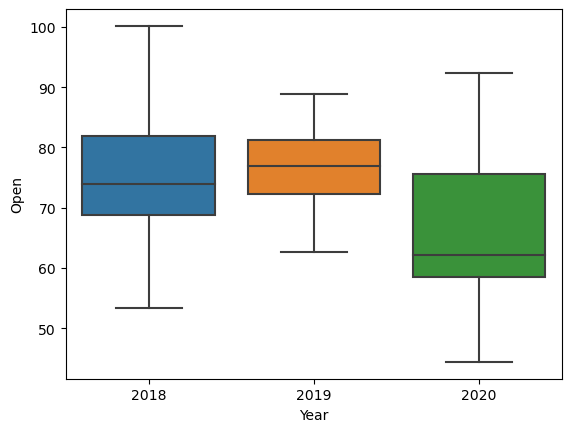

In [43]:
sns.boxplot(data=PNJdf, x="Year", y="Open")

## FPT

In [44]:
FPTdf['Year'] = FPTdf.index.year
FPTdf.head(9)

,Ticker,Open,High,Low,Close,Volume,Year
Date/Time,,,,,,,
2018-12-25 09:15:00,FPT,30.89,30.89,30.89,30.89,35410,2018
2018-12-25 09:16:00,FPT,30.81,30.81,30.81,30.81,190,2018
2018-12-25 09:17:00,FPT,30.74,30.81,30.74,30.74,1120,2018
2018-12-25 09:18:00,FPT,30.74,30.74,30.74,30.74,2120,2018
2018-12-25 09:19:00,FPT,30.74,30.74,30.74,30.74,22500,2018
2018-12-25 09:20:00,FPT,30.74,30.74,30.70,30.74,7140,2018
2018-12-25 09:21:00,FPT,30.66,30.74,30.59,30.66,16480,2018
2018-12-26 09:15:00,FPT,31.04,31.11,31.04,31.11,2650,2018
2018-12-26 09:16:00,FPT,31.19,31.19,31.19,31.19,500,2018


<Axes: xlabel='Year', ylabel='Open'>

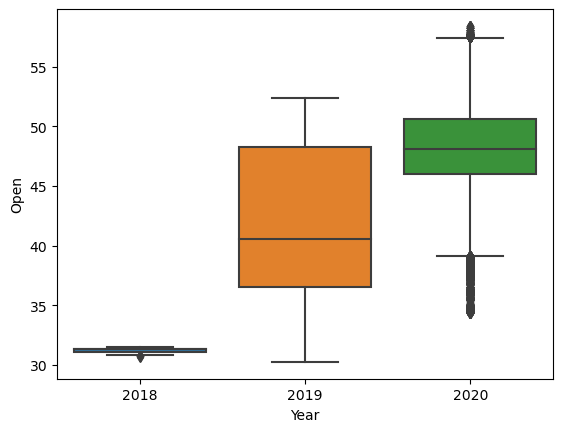

In [45]:
sns.boxplot(data=FPTdf, x="Year", y="Open")

In [60]:
FPTdf_2020=FPTdf.loc[FPTdf['Year'] == 2020]
FPTdf_2020.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51999 entries, 2020-01-02 09:15:00 to 2020-12-22 14:46:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  51999 non-null  object 
 1   Open    51999 non-null  float64
 2   High    51999 non-null  float64
 3   Low     51999 non-null  float64
 4   Close   51999 non-null  float64
 5   Volume  51999 non-null  int64  
 6   Year    51999 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 3.2+ MB


In [62]:
# calculate IQR for column Height
Q1 = FPTdf_2020['Open'].quantile(0.25)
Q3 = FPTdf_2020['Open'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
FPTdf_2020_outlier = FPTdf_2020[(FPTdf_2020['Open'] < Q1 - threshold * IQR) | (FPTdf_2020['Open'] > Q3 + threshold * IQR)]
FPTdf_2020_outlier.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2276 entries, 2020-03-13 09:15:00 to 2020-12-22 14:46:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  2276 non-null   object 
 1   Open    2276 non-null   float64
 2   High    2276 non-null   float64
 3   Low     2276 non-null   float64
 4   Close   2276 non-null   float64
 5   Volume  2276 non-null   int64  
 6   Year    2276 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 142.2+ KB


In [65]:
FPTdf_2020_outlier.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2276 entries, 2020-03-13 09:15:00 to 2020-12-22 14:46:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  2276 non-null   object 
 1   Open    2276 non-null   float64
 2   High    2276 non-null   float64
 3   Low     2276 non-null   float64
 4   Close   2276 non-null   float64
 5   Volume  2276 non-null   int64  
 6   Year    2276 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 142.2+ KB


## IBM

In [46]:
IBMdf['Year'] = IBMdf.index.year
IBMdf.head(9)

,Ticker,Open,High,Low,Close,Volume,Year
Date/Time,,,,,,,
2018-01-02 06:20:00,IBM,110.209,110.419,109.867,110.051,104,2018
2018-01-02 07:00:00,IBM,110.037,110.247,109.695,109.879,209,2018
2018-01-02 07:35:00,IBM,110.252,110.462,109.910,110.094,115,2018
2018-01-02 08:30:00,IBM,110.395,110.606,110.053,110.237,104,2018
2018-01-02 08:35:00,IBM,110.395,110.606,110.053,110.237,209,2018
2018-01-02 08:55:00,IBM,110.395,110.606,110.024,110.208,661,2018
2018-01-02 09:00:00,IBM,110.567,110.786,110.224,110.416,722,2018
2018-01-02 09:20:00,IBM,110.403,110.620,110.060,110.244,1046,2018
2018-01-02 09:25:00,IBM,110.575,111.073,110.231,110.702,1317,2018


<Axes: xlabel='Year', ylabel='Open'>

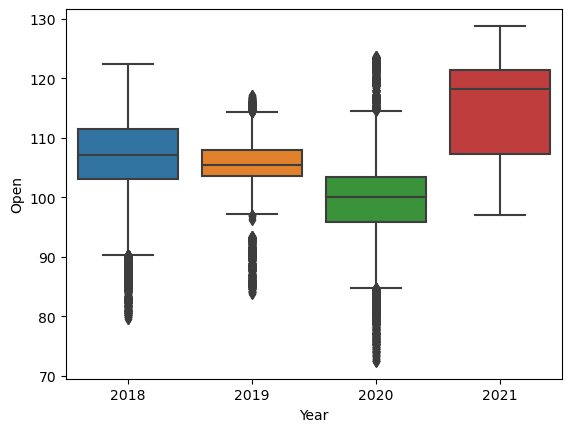

In [47]:
sns.boxplot(data=IBMdf, x="Year", y="Open")